In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df=sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [25]:
group = df.groupby('sex')['survived'].value_counts().sort_index()
group

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [26]:
group.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['sex', 'survived'])

In [38]:
group

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

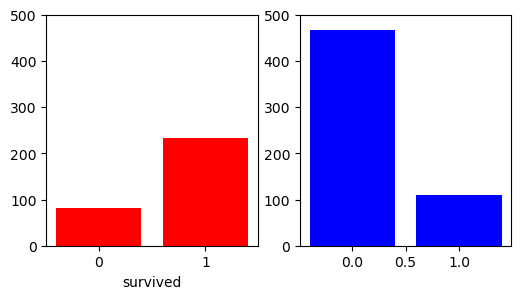

In [56]:
fig, ax = plt.subplots(1,2, figsize=[6,3])
ax[0].bar(group['female'].index, group['female'], color='red')
ax[0].set_xticks(group['female'].index)
ax[0].set_xlabel('survived')
ax[0].set_ylim(0,500)

ax[1].bar(group['male'].index, group['male'], color='blue')
ax[1].set_ylim(0,500)

plt.show()

In [73]:
group=df.groupby('survived')['sex'].value_counts().sort_index()
group

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: count, dtype: int64

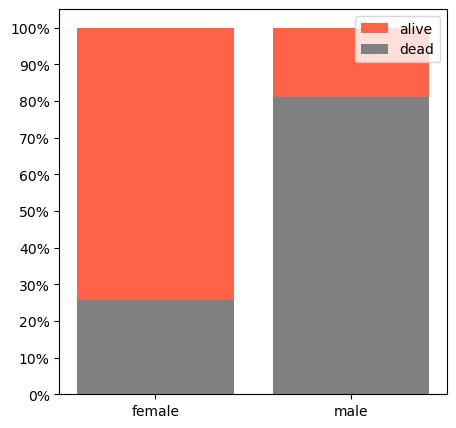

In [94]:
total = group[0]+group[1]

fig, ax = plt.subplots(1,1, figsize=[5,5])
ax.bar(group[1].index, group[1]/total, bottom=group[0]/total, color='tomato', label='alive')
ax.bar(group[0].index, group[0]/total, color='grey', label='dead')

plt.yticks(np.arange(0,1.1,0.1),labels=[f'{i}%' for i in range(0, 101, 10)])
plt.legend()
plt.show()

In [96]:
group=df.groupby('sex')['survived'].value_counts().sort_index()
group

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

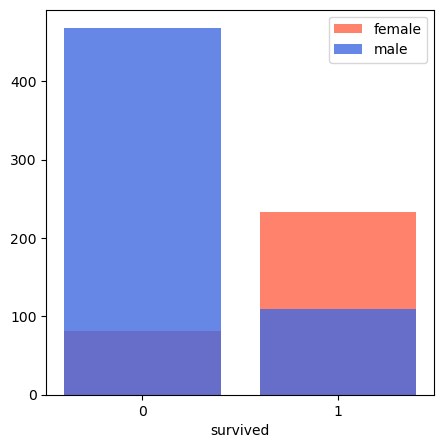

In [119]:
fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.bar(group['female'].index, group['female'], alpha=0.8, label='female', color='tomato')
ax.bar(group['male'].index, group['male'], alpha=0.8, label='male', color='royalblue')
ax.set_xticks([0,1])

plt.xlabel('survived')
plt.legend()
plt.show()